In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [2]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_4.xlsx', index_col=0)
df.head()

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
0,오징어 게임,Squid Game,2021,1,55,"액션, 드라마, 스릴러",19,대한민국,549000,8.0,...,NaN,NaN,NaN,NaN,NaN,['Hwang Dong-hyuk'],['Hwang Dong-hyuk'],"['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...",Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/
1,12인의 심판자,The Twelve,2019,2,54,"드라마, 스릴러",19,벨기에,6500,7.4,...,NaN,NaN,NaN,NaN,NaN,"['Kaat Beels', 'Wouter Bouvijn']","['Bert Van Dael', 'Nele Meirhaeghe', 'Roel Mon...","['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...",The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/
2,희생자 게임,The Victims' Game,2020,1,60,"드라마, 범죄, 스릴러",19,대만,1900,7.3,...,NaN,NaN,NaN,NaN,NaN,"['David Chuang', 'Kuan-Chung Chen']","['Joyce Liu', 'Jui-Liang Hsu', 'Shih-Keng Chie...","['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...",The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,미국,68000,7.7,...,NaN,NaN,NaN,NaN,NaN,"['Alexis Ostrander', 'Carol Banker', 'Ciarán F...","['Beth Schwartz', 'Bo Yeon Kim', 'Carly Woodwo...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/
4,스위트홈,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",19,대한민국,33000,7.3,...,NaN,NaN,NaN,NaN,NaN,"['Jang Young-woo', 'Lee Eung-bok', 'Park So-hy...","['Hong So-ri', 'Hwang Young-Chan', 'Kim Hyung-...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          908 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1     

In [4]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [5]:
# 리스트가 아닌 문자열로 저장됨
print(len(df['production'][1]))
print(df['production'][1][0])

2
Vlaamse Radio en Televisie (VRT)


In [6]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [7]:
print(df['season_1'][0])

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'], 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'], 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'], 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'], 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'], 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'], 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'], 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'], 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}


In [8]:
# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=17):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([float(ep[0]) for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([int(ep[1]) for ep in x.values()]) / len(x) if x else None
        )

# 모든 시즌에 대해 변환 및 평균 계산
process_seasons(df)

# 변환된 데이터프레임 출력
print(df)

                korean_title                      english_title  year  \
0                     오징어 게임                         Squid Game  2021   
1                   12인의 심판자                         The Twelve  2019   
2                     희생자 게임                  The Victims' Game  2020   
3         스위트 투스: 사슴뿔을 가진 소년                        Sweet Tooth  2021   
4                       스위트홈                         Sweet Home  2020   
..                       ...                                ...   ...   
903                      레일라                              Leila  2019   
904              100만 엔의 여인들                  Million Yen Women  2017   
905                  킬러 코미디언                            Hasmukh  2020   
906                       달러                             Dollar  2019   
907  엘리트들, 못다 한 이야기: 나디아 구스만  Elite Short Stories: Nadia Guzmán  2021   

     total_season_num  runtime                      genre age_rating  \
0                   1       55               액션, 드라

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 907
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        908 non-null    object 
 1   english_title       908 non-null    object 
 2   year                908 non-null    int64  
 3   total_season_num    908 non-null    int64  
 4   runtime             908 non-null    int64  
 5   genre               908 non-null    object 
 6   age_rating          908 non-null    object 
 7   production_country  908 non-null    object 
 8   total_count         908 non-null    int64  
 9   total_rate          908 non-null    float64
 10  watchlist           908 non-null    int64  
 11  popularity          908 non-null    int64  
 12  user_review         908 non-null    int64  
 13  critic_review       908 non-null    int64  
 14  production          824 non-null    object 
 15  distributor         900 non-null    object 
 16  season_1     

In [10]:
print(df['s1_avg_rating'][0])

8.011111111111113


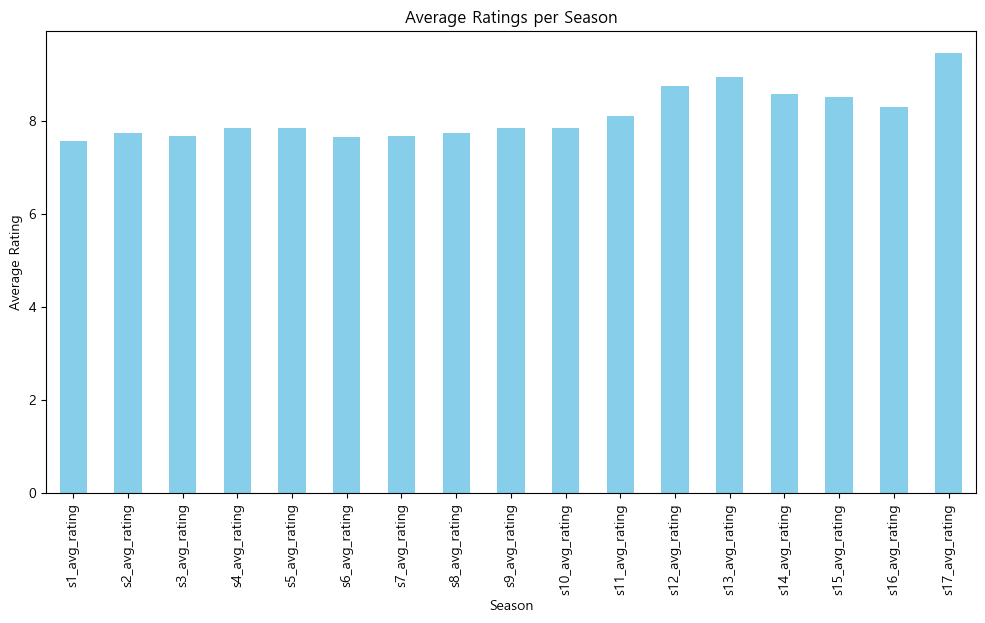

In [11]:
# 시즌별 평균 평점 비교
avg_rating_columns = [col for col in df.columns if 'avg_rating' in col]
avg_ratings = df[avg_rating_columns].mean()

plt.figure(figsize=(12, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings per Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

### - 회차를 거듭할수록 시즌별 평균 평점이 증가하는 것처럼 보임

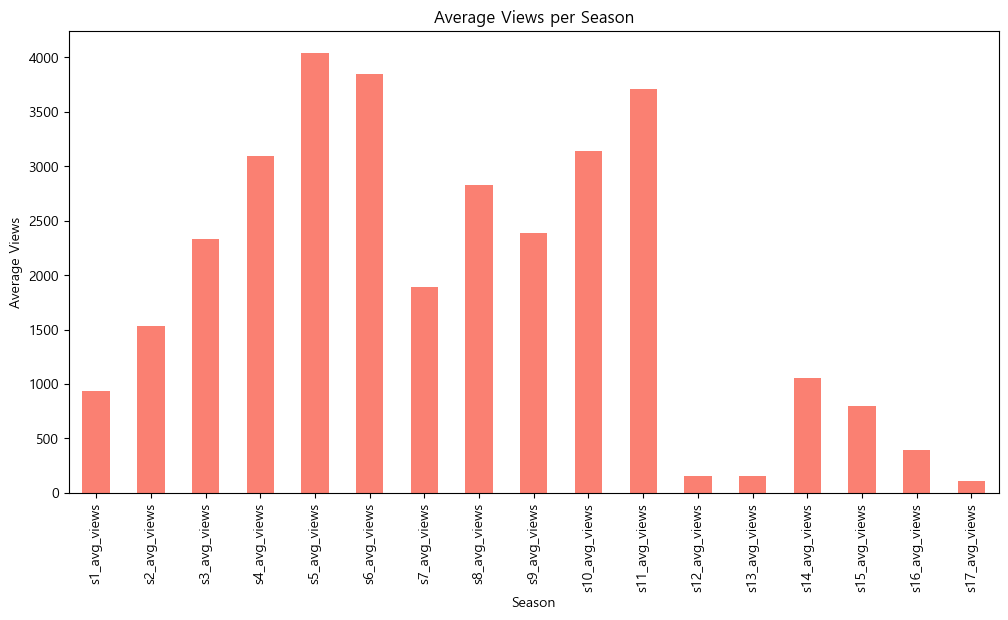

In [12]:
# 시즌별 평균 조회수 비교
avg_views_columns = [col for col in df.columns if 'avg_views' in col]
avg_views = df[avg_views_columns].mean()

plt.figure(figsize=(12, 6))
avg_views.plot(kind='bar', color='salmon')
plt.title('Average Views per Season')
plt.xlabel('Season')
plt.ylabel('Average Views')
plt.show()

In [13]:
avg_views

s1_avg_views      934.063686
s2_avg_views     1529.039206
s3_avg_views     2335.086317
s4_avg_views     3092.458336
s5_avg_views     4042.186581
s6_avg_views     3846.962639
s7_avg_views     1889.508926
s8_avg_views     2828.346058
s9_avg_views     2385.887872
s10_avg_views    3141.249158
s11_avg_views    3705.722222
s12_avg_views     152.181818
s13_avg_views     155.500000
s14_avg_views    1053.700000
s15_avg_views     797.200000
s16_avg_views     398.000000
s17_avg_views     106.600000
dtype: float64

In [14]:
# 시즌10이상인 드라마
df[df['total_season_num']>=10]

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,s13_avg_rating,s13_avg_views,s14_avg_rating,s14_avg_views,s15_avg_rating,s15_avg_views,s16_avg_rating,s16_avg_views,s17_avg_rating,s17_avg_views
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,블랙리스트,The Blacklist,2013,10,43,"스릴러, 범죄, 드라마",15,미국,281000,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,하트랜드,Heartland,2007,17,44,"드라마, 가족, 코미디",12,캐나다,20000,8.5,...,8.95,155.5,8.57,1053.7,8.51,797.2,8.3,398.0,9.46,106.6


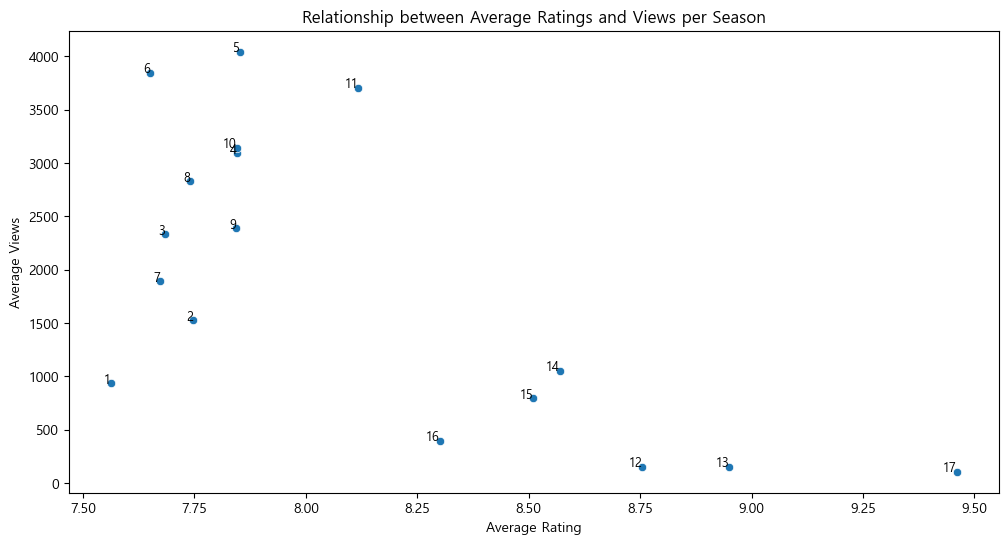

In [15]:
# 시즌별 평균 평점과 조회수 데이터프레임 생성
avg_ratings_views = pd.DataFrame({
    'Season': range(1, 18),
    'Average Rating': [df[f's{s}_avg_rating'].mean() for s in range(1, 18)],
    'Average Views': [df[f's{s}_avg_views'].mean() for s in range(1, 18)]
})

# 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Rating', y='Average Views', data=avg_ratings_views)

# 각 점에 시즌 번호를 레이블로 추가
for i in range(len(avg_ratings_views)):
    plt.text(avg_ratings_views['Average Rating'][i], avg_ratings_views['Average Views'][i], avg_ratings_views['Season'][i], fontsize=9, ha='right')

plt.title('Relationship between Average Ratings and Views per Season')
plt.xlabel('Average Rating')
plt.ylabel('Average Views')
plt.show()

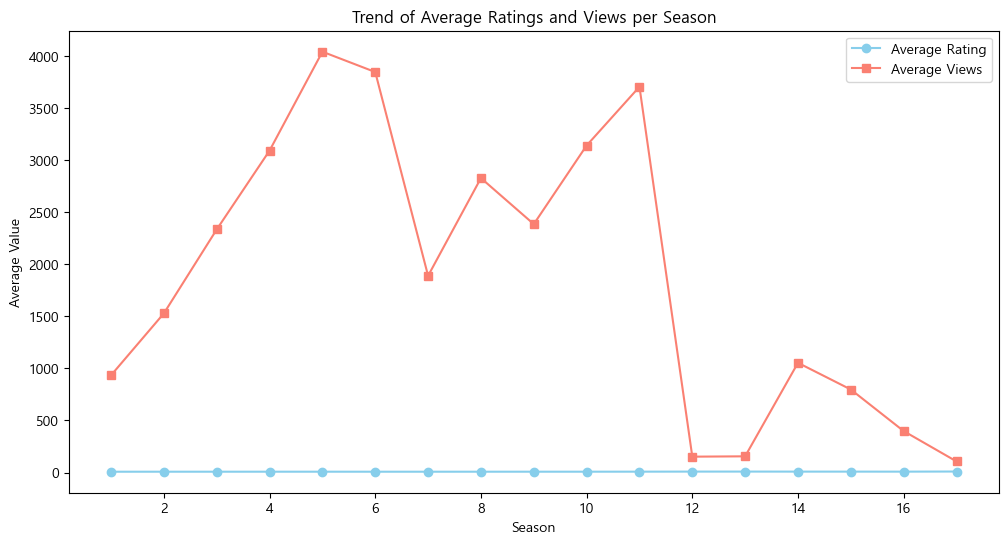

In [16]:
# 시즌별 평점과 조회수의 추세
seasons = range(1, len(avg_ratings) + 1)

plt.figure(figsize=(12, 6))
plt.plot(seasons, avg_ratings.values, marker='o', color='skyblue', label='Average Rating')
plt.plot(seasons, avg_views.values, marker='s', color='salmon', label='Average Views')
plt.title('Trend of Average Ratings and Views per Season')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.legend()
plt.show()

---

In [17]:
# 시즌 1과 시즌 2의 평균 평점 및 조회수 추출
s1_avg_rating = df['s1_avg_rating']
s2_avg_rating = df['s2_avg_rating']
s1_avg_views = df['s1_avg_views']
s2_avg_views = df['s2_avg_views']

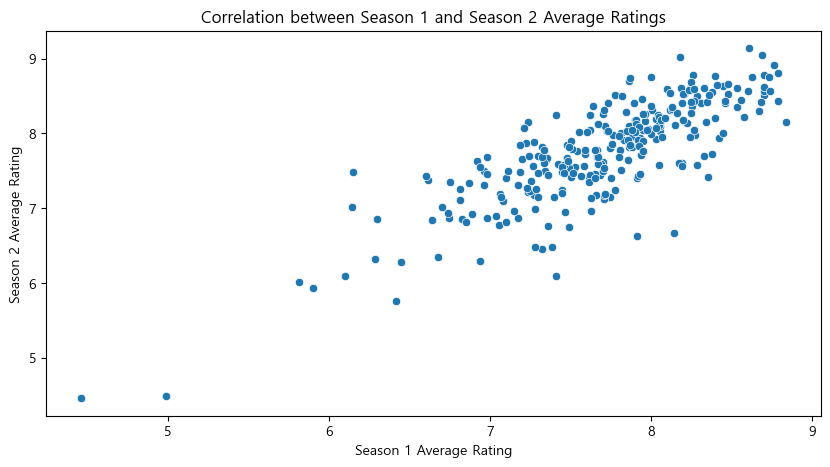

Correlation between Season 1 and Season 2 Average Ratings: 0.8175419401483404


In [18]:
# 시즌 1과 시즌 2의 평균 평점 간의 상관관계
plt.figure(figsize=(10, 5))
sns.scatterplot(x=s1_avg_rating, y=s2_avg_rating)
plt.title('Correlation between Season 1 and Season 2 Average Ratings')
plt.xlabel('Season 1 Average Rating')
plt.ylabel('Season 2 Average Rating')
plt.show()

# 상관계수 계산
rating_corr = s1_avg_rating.corr(s2_avg_rating)
print(f"Correlation between Season 1 and Season 2 Average Ratings: {rating_corr}")

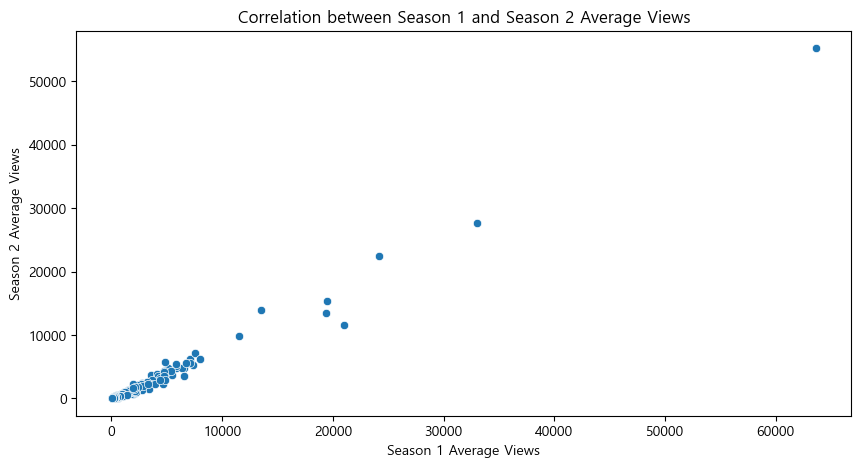

Correlation between Season 1 and Season 2 Average Views: 0.9917287580029752


In [19]:
# 시즌 1과 시즌 2의 평균 조회수 간의 상관관계
plt.figure(figsize=(10, 5))
sns.scatterplot(x=s1_avg_views, y=s2_avg_views)
plt.title('Correlation between Season 1 and Season 2 Average Views')
plt.xlabel('Season 1 Average Views')
plt.ylabel('Season 2 Average Views')
plt.show()

# 상관계수 계산
views_corr = s1_avg_views.corr(s2_avg_views)
print(f"Correlation between Season 1 and Season 2 Average Views: {views_corr}")

In [23]:
# 시즌 1의 평균 평점이 높은 10개 작품 (시즌 2가 없는 작품)
top_10_no_season_2 = df[df['season_2'].isna()].nlargest(10, 's1_avg_rating')

# 시즌 1의 평균 평점이 높은 10개 작품 (시즌 2가 있는 작품)
top_10_with_season_2 = df[df['season_2'].notna()].nlargest(10, 's1_avg_rating')

# 두 그룹을 비교하는 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Title': top_10_no_season_2['korean_title'].tolist() + top_10_with_season_2['korean_title'].tolist(),
    'Season 1 Avg Rating': top_10_no_season_2['s1_avg_rating'].tolist() + top_10_with_season_2['s1_avg_rating'].tolist(),
    'Has Season 2': ['No'] * 10 + ['Yes'] * 10
})

print(comparison_df)

                Title  Season 1 Avg Rating Has Season 2
0             페르마의 요리             9.690000           No
1               멜랑꼴리아             9.543750           No
2     여생 청다지교: 사랑의 서약             9.487500           No
3                 산하령             9.310811           No
4            아날로그 스쿼드             9.300000           No
5             징크스의 연인             9.243750           No
6                  봄밤             9.237500           No
7                 옥골요             9.102500           No
8              니미소시흔미             9.090323           No
9   내일 지구가 망해버렸으면 좋겠어             9.083333           No
10            드래곤 사쿠라             8.836364          Yes
11            기묘한 이야기             8.787500          Yes
12              하트스토퍼             8.787500          Yes
13            아스달 연대기             8.766667          Yes
14                 환혼             8.740000          Yes
15                덱스터             8.733333          Yes
16            빨간 머리 앤             8.700000      

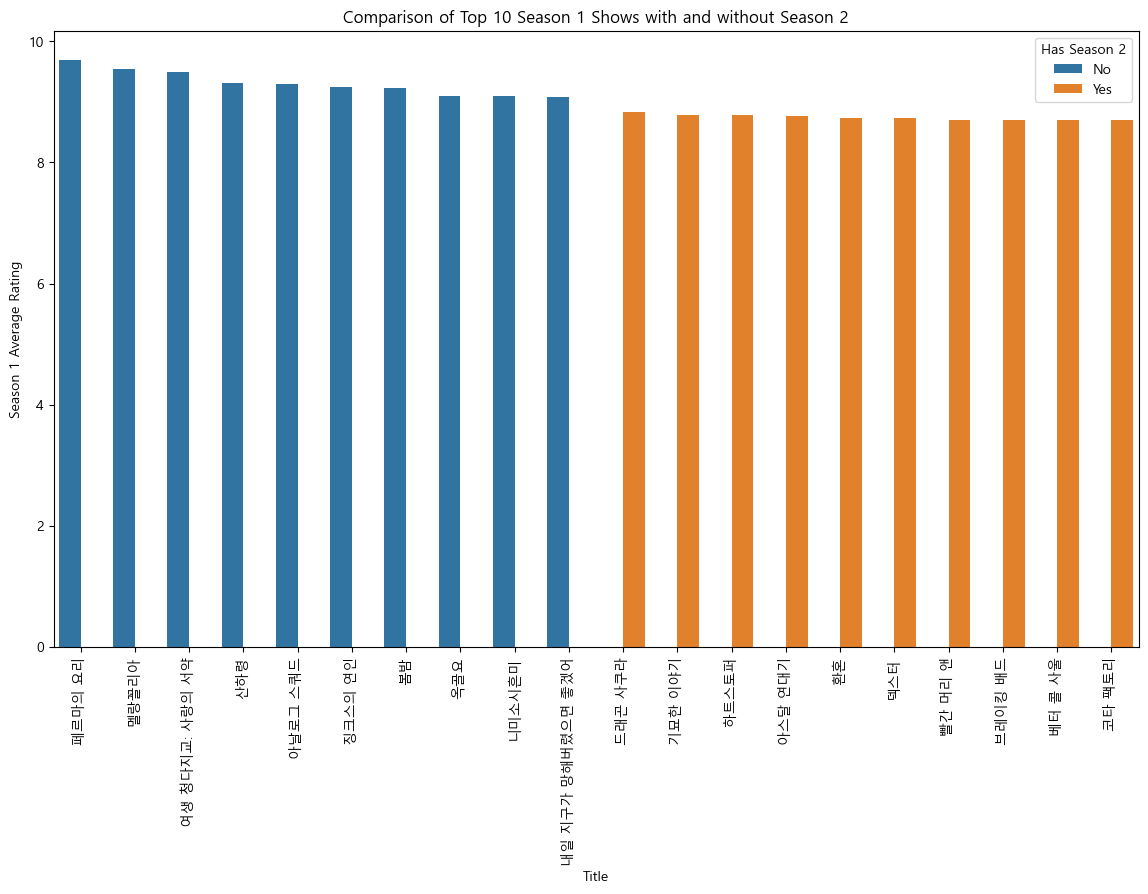

In [24]:
# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='Title', y='Season 1 Avg Rating', hue='Has Season 2', data=comparison_df)
plt.title('Comparison of Top 10 Season 1 Shows with and without Season 2')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Season 1 Average Rating')
plt.legend(title='Has Season 2')
plt.show()

---

## 시즌10개이상 작품들

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_15116\1945088024.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[avg_rating_col] = df[season_col].apply(
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_15116\1945088024.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[avg_views_col] = df[season_col].apply(
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_15116\1945088024.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

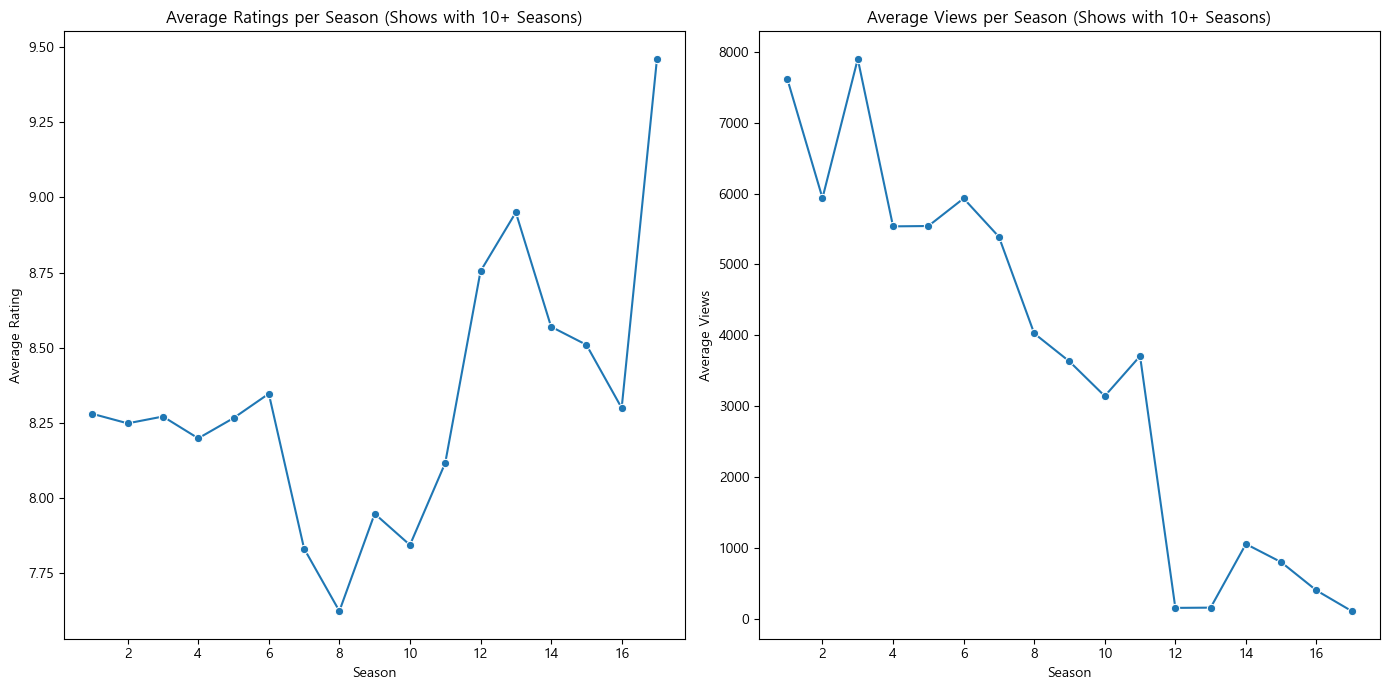

In [25]:
# 시즌 10개 이상 있는 작품 필터링
df_filtered = df[df['total_season_num'] >= 10]

# 모든 시즌에 대해서 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=17):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        df[avg_rating_col] = df[season_col].apply(
            lambda x: sum([ep[0] for ep in x.values()]) / len(x) if x else None
        )
        df[avg_views_col] = df[season_col].apply(
            lambda x: sum([ep[1] for ep in x.values()]) / len(x) if x else None
        )

# 시즌 10개 이상 있는 작품에 대해 변환 및 평균 계산
process_seasons(df_filtered, start_season=1, end_season=17)

# 시즌별 평균 평점과 조회수 데이터프레임 생성
avg_ratings_views = pd.DataFrame({
    'Season': range(1, 18),
    'Average Rating': [df_filtered[f's{s}_avg_rating'].mean() for s in range(1, 18)],
    'Average Views': [df_filtered[f's{s}_avg_views'].mean() for s in range(1, 18)]
})

# 시각화
plt.figure(figsize=(14, 7))

# 평점 시각화
plt.subplot(1, 2, 1)
sns.lineplot(x='Season', y='Average Rating', data=avg_ratings_views, marker='o')
plt.title('Average Ratings per Season (Shows with 10+ Seasons)')
plt.xlabel('Season')
plt.ylabel('Average Rating')

# 조회수 시각화
plt.subplot(1, 2, 2)
sns.lineplot(x='Season', y='Average Views', data=avg_ratings_views, marker='o')
plt.title('Average Views per Season (Shows with 10+ Seasons)')
plt.xlabel('Season')
plt.ylabel('Average Views')

plt.tight_layout()
plt.show()

---

# 배급사 & 제작사

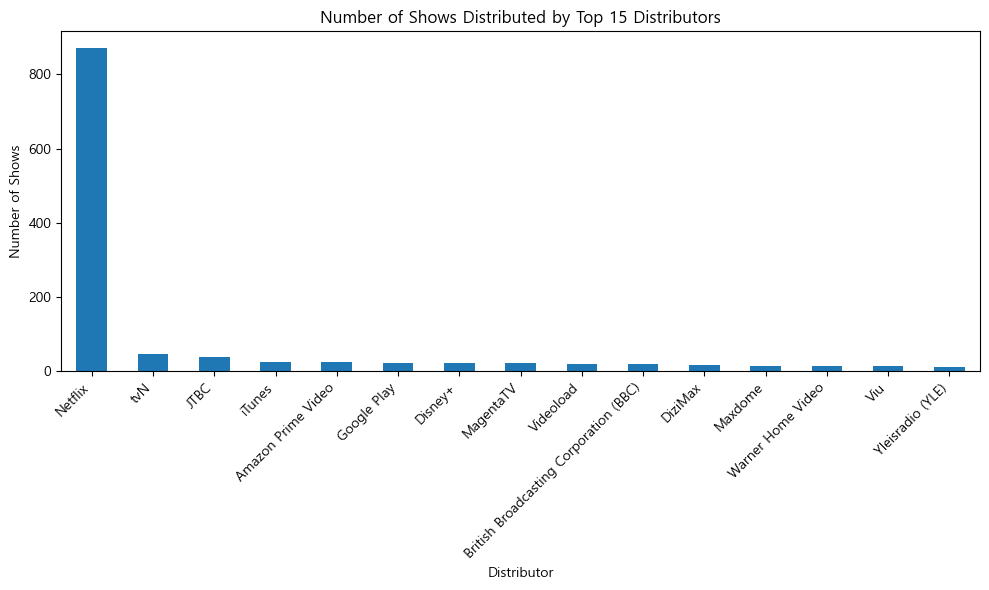

In [26]:
# 데이터프레임에서 배급사 정보 가져오기 (리스트 형태)
distributors = df['distributor'].explode().dropna()

# 각 배급사별 작품 수 계산
distributor_counts = distributors.value_counts()

# 탑 15개 배급사 선택
top_15_distributors = distributor_counts.head(15)

# 시각화
plt.figure(figsize=(10, 6))
top_15_distributors.plot(kind='bar')
plt.title('Number of Shows Distributed by Top 15 Distributors')
plt.xlabel('Distributor')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

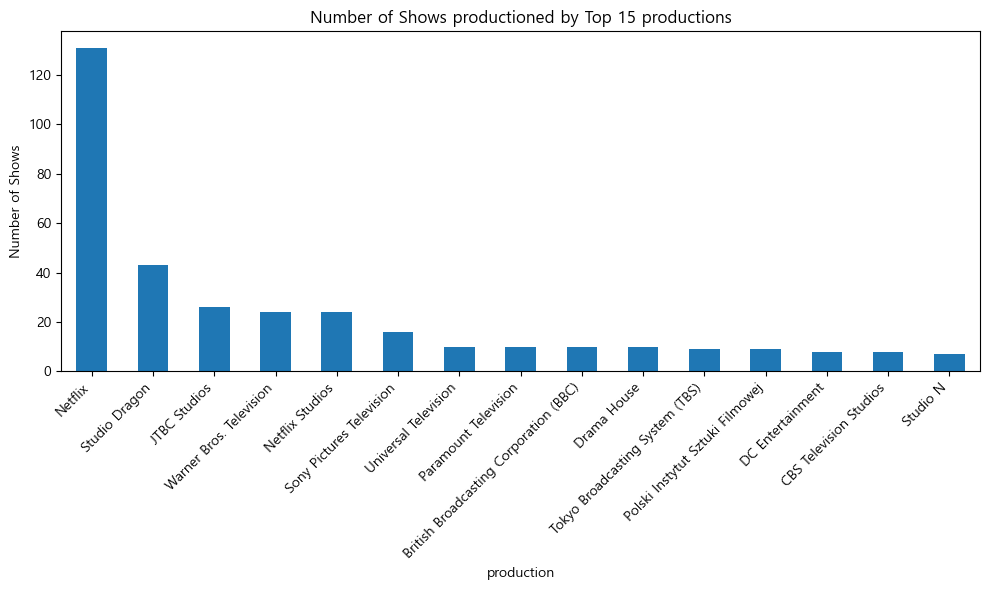

In [ ]:
# 데이터프레임에서 제작사 정보 가져오기 (리스트 형태)
productions = df['production'].explode().dropna()

# 각 제작사별 작품 수 계산
production_counts = productions.value_counts()

# 탑 15개 제작사 선택
top_15_productions = production_counts.head(15)

# 시각화
plt.figure(figsize=(10, 6))
top_15_productions.plot(kind='bar')
plt.title('Number of Shows productioned by Top 15 productions')
plt.xlabel('production')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

In [28]:
# NaN 값을 빈 리스트로 변환
df['distributor'] = df['distributor'].apply(lambda x: x if isinstance(x, list) else [])

# 'tvN'이 포함된 작품 필터링
tvN_shows = df[df['distributor'].apply(lambda x: 'TVN' in x)]

# 결과 확인
print(tvN_shows)

    korean_title                    english_title  year  total_season_num  \
10     슬기로운 감빵생활                  Prison Playbook  2017                 1   
184   김비서가 왜 그럴까  What's Wrong with Secretary Kim  2018                 1   
764      백일의 낭군님               100 Days My Prince  2018                 1   

     runtime                       genre age_rating production_country  \
10        91                    드라마, 코미디         15               대한민국   
184       24               코미디, 드라마, 로맨스         15               대한민국   
764       71  드라마, 스릴러, 코미디, 로맨스, 액션, 역사         15               대한민국   

     total_count  total_rate  ...  s13_avg_rating  s13_avg_views  \
10          4900         8.4  ...             NaN            NaN   
184        19000         8.1  ...             NaN            NaN   
764         3700         7.8  ...             NaN            NaN   

     s14_avg_rating  s14_avg_views s15_avg_rating s15_avg_views  \
10              NaN            NaN            NaN     